In [ ]:
!pip install yfinance pmdarima

import yfinance as yf

import pmdarima as pm

import warnings; warnings.filterwarnings('ignore')

origin = yf.download('GOOG', start='2022-10-25', end='2024-10-25')

In [2]:
import pandas, numpy as np

origin.iloc[:5]

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2022-10-25 00:00:00+00:00,104.672943,104.930000,105.099998,103.019997,103.300003,29910200
2022-10-26 00:00:00+00:00,94.587708,94.820000,98.540001,94.570000,96.760002,71504300
2022-10-27 00:00:00+00:00,92.373146,92.599998,95.169998,91.900002,94.309998,54036500
2022-10-28 00:00:00+00:00,96.343399,96.580002,96.860001,92.322998,92.529999,35696900
2022-10-31 00:00:00+00:00,94.428108,94.660004,96.349998,94.379997,95.779999,29868700


In [3]:
google = origin["Close"]

google.index = google.index.date

google.index.name = "Tanggal"

google.columns = ["Google Close"]

google.iloc[:5]

,Google Close
Tanggal,
2022-10-25,104.930000
2022-10-26,94.820000
2022-10-27,92.599998
2022-10-28,96.580002
2022-10-31,94.660004


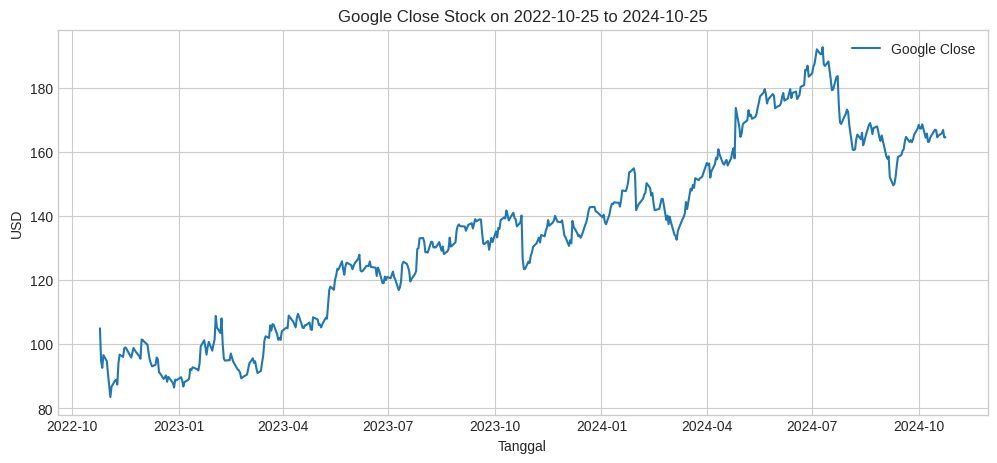

In [4]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-whitegrid")

plt.rcParams["figure.figsize"] = (12, 5)

title = "Google Close Stock on 2022-10-25 to 2024-10-25"

google.plot.line(title=title, xlabel="Tanggal", ylabel="USD", rot=0);

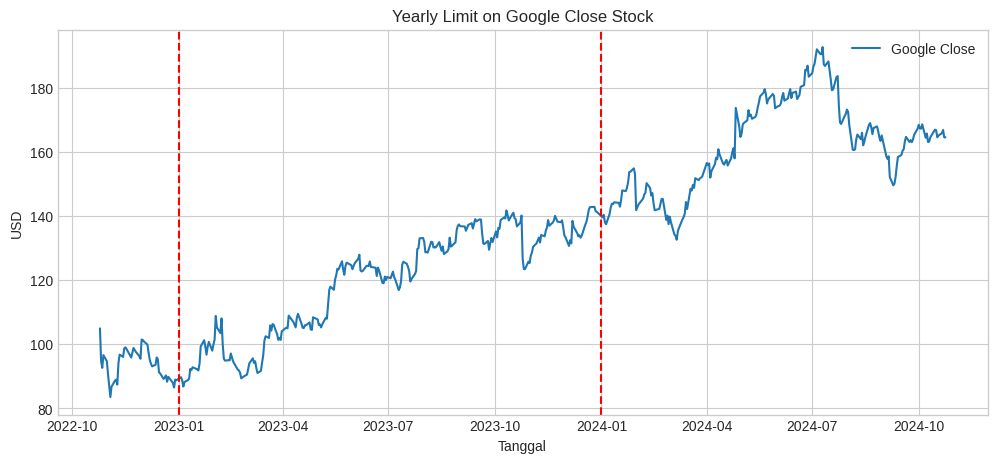

In [5]:
title = "Yearly Limit on Google Close Stock"

goplot = google.plot.line(title=title, xlabel="Tanggal", ylabel="USD")

for dately in ["2023-01-01", "2024-01-01"]:

  goplot.axvline(dately, color="r", linestyle="--");

In [6]:
google.isnull().sum().sum()

0

In [7]:
total_google = len(google)

total_google

503

In [8]:
google.index[:5]

Index([2022-10-25, 2022-10-26, 2022-10-27, 2022-10-28, 2022-10-31], dtype='object', name='Tanggal')

In [9]:
google.index = pandas.to_datetime(google.index)

google.index.dtype

dtype('<M8[ns]')

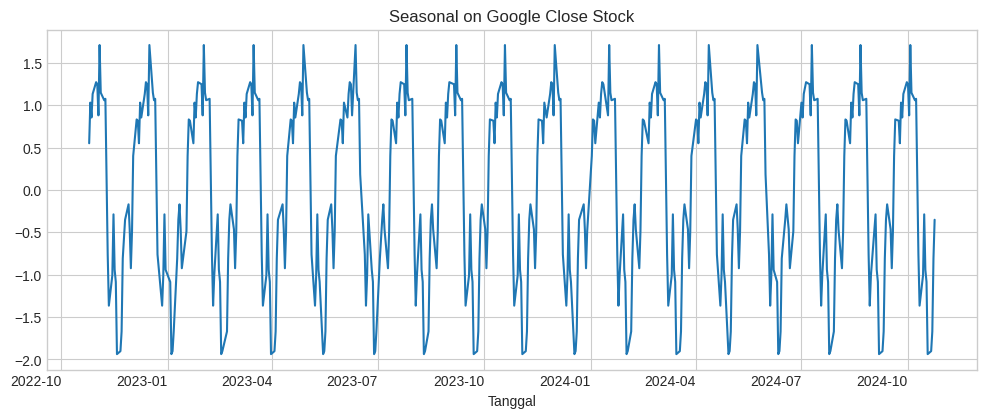

In [10]:
from statsmodels.tools.sm_exceptions import ValueWarning

from statsmodels.tsa.seasonal import seasonal_decompose

warnings.simplefilter('ignore', ValueWarning)

seasonal_plot = seasonal_decompose(google, period=30)

seasonal_plot.seasonal.plot(title="Seasonal on Google Close Stock", rot=0);

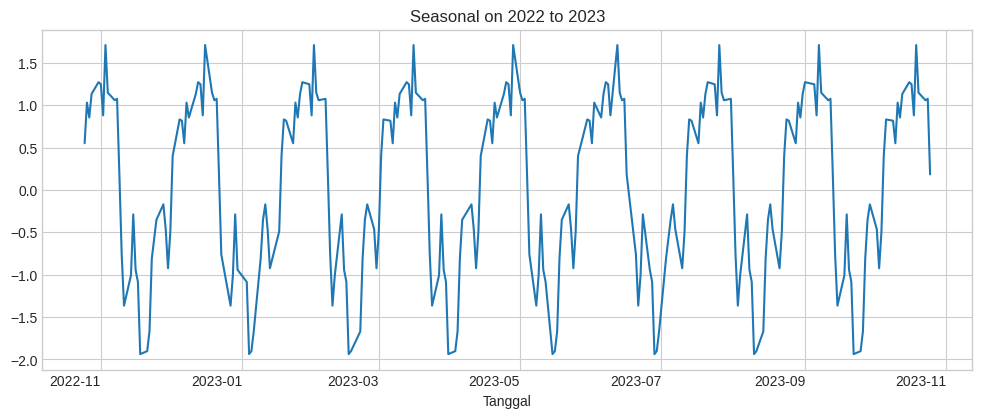

In [11]:
seasonal_plot = seasonal_decompose(google, period=30)

seasonal_plot = seasonal_plot.seasonal.loc["2022-10-25":"2023-10-25"]

seaplot = seasonal_plot.plot(title="Seasonal on 2022 to 2023", rot=0);